# Climate Analysis and Exploration

In [1]:
# Dependencies
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

import numpy as np
import pandas as pd
import datetime as dt

import sqlalchemy
from sqlalchemy import create_engine, inspect

In [2]:
# Create the connection engine
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [3]:
#Connect engine and create the inspector
conn = engine.connect()
inspector = inspect(engine)

In [4]:
# Get the names of tables within the database
inspector.get_table_names()

['measurement', 'station']

### Precipitation Analysis

In [5]:
# Create first query 
query_measurement = """
    SELECT
        *
    FROM
        measurement

"""


In [6]:
#Dataframe for measurement database
df = pd.read_sql(query_measurement, conn)
df.head()

,id,station,date,prcp,tobs
0,1,USC00519397,2010-01-01,0.08,65.0
1,2,USC00519397,2010-01-02,0.00,63.0
2,3,USC00519397,2010-01-03,0.00,74.0
3,4,USC00519397,2010-01-04,0.00,76.0
4,5,USC00519397,2010-01-06,NaN,73.0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19550 entries, 0 to 19549
Data columns (total 5 columns):
id         19550 non-null int64
station    19550 non-null object
date       19550 non-null object
prcp       18103 non-null float64
tobs       19550 non-null float64
dtypes: float64(2), int64(1), object(2)
memory usage: 763.8+ KB


In [8]:
df.describe()

,id,prcp,tobs
count,19550.000000,18103.000000,19550.000000
mean,9775.500000,0.160644,73.097954
std,5643.743217,0.468746,4.523527
min,1.000000,0.000000,53.000000
25%,4888.250000,0.000000,70.000000
50%,9775.500000,0.010000,73.000000
75%,14662.750000,0.110000,76.000000
max,19550.000000,11.530000,87.000000


In [9]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results

query_station = """
            SELECT
                *
            FROM
                station

"""

In [10]:
#Dataframe for measurement database
df2 = pd.read_sql(query_station, conn)
df2

,id,station,name,latitude,longitude,elevation
0,1,USC00519397,"WAIKIKI 717.2, HI US",21.27160,-157.81680,3.0
1,2,USC00513117,"KANEOHE 838.1, HI US",21.42340,-157.80150,14.6
2,3,USC00514830,"KUALOA RANCH HEADQUARTERS 886.9, HI US",21.52130,-157.83740,7.0
3,4,USC00517948,"PEARL CITY, HI US",21.39340,-157.97510,11.9
4,5,USC00518838,"UPPER WAHIAWA 874.3, HI US",21.49920,-158.01110,306.6
5,6,USC00519523,"WAIMANALO EXPERIMENTAL FARM, HI US",21.33556,-157.71139,19.5
6,7,USC00519281,"WAIHEE 837.5, HI US",21.45167,-157.84889,32.9
7,8,USC00511918,"HONOLULU OBSERVATORY 702.2, HI US",21.31520,-157.99920,0.9
8,9,USC00516128,"MANOA LYON ARBO 785.2, HI US",21.33310,-157.80250,152.4


In [11]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 6 columns):
id           9 non-null int64
station      9 non-null object
name         9 non-null object
latitude     9 non-null float64
longitude    9 non-null float64
elevation    9 non-null float64
dtypes: float64(3), int64(1), object(2)
memory usage: 560.0+ bytes


In [12]:
df2.describe()

,id,latitude,longitude,elevation
count,9.000000,9.000000,9.000000,9.000000
mean,5.000000,21.393826,-157.867098,60.977778
std,2.738613,0.086442,0.103873,103.465547
min,1.000000,21.271600,-158.011100,0.900000
25%,3.000000,21.333100,-157.975100,7.000000
50%,5.000000,21.393400,-157.837400,14.600000
75%,7.000000,21.451670,-157.802500,32.900000
max,9.000000,21.521300,-157.711390,306.600000


In [13]:
for column in inspector.get_columns("measurement"):
    print(column["name"], column["type"])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [14]:
for column in inspector.get_columns("station"):
    print(column["name"], column["type"])

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


In [15]:
# Calculate the date 1 year ago from the last data point in the database

prev_year = dt.date(2017, 8, 23) - dt.timedelta(days=365)
prev_year

datetime.date(2016, 8, 23)

In [16]:
# Perform a query to retrieve the data and precipitation scores
query_date = """
        SELECT
            date,
            prcp
        FROM
            measurement
        WHERE
            date > '2016-08-23'

"""

In [17]:
# Save the query results as a Pandas DataFrame and set the index to the date column
# Sort the dataframe by date
df3 = pd.read_sql(query_date, conn).sort_values('date')
print(len(df3))
df3.head()


2223


,date,prcp
0,2016-08-24,0.08
1006,2016-08-24,NaN
1524,2016-08-24,2.15
702,2016-08-24,2.28
360,2016-08-24,2.15


In [18]:
df3.tail()

,date,prcp
1522,2017-08-22,0.00
1523,2017-08-23,0.08
359,2017-08-23,0.00
1005,2017-08-23,0.00
2222,2017-08-23,0.45


In [19]:
df3["Date"] = pd.to_datetime(df3.date)

C:\Users\anagi\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


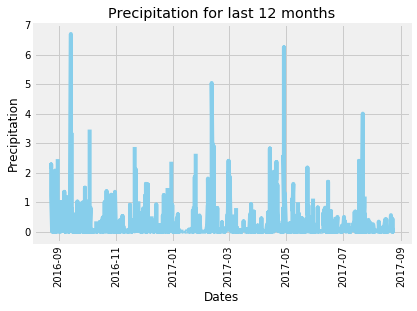

<Figure size 432x288 with 0 Axes>

In [20]:
# Use Pandas Plotting with Matplotlib to plot the data
# Create line graph for date and prcp
plt.plot(df3.Date, df3.prcp, color = 'skyblue')
plt.xticks(rotation = 90)
plt.xlabel('Dates')
plt.ylabel('Precipitation')
plt.title("Precipitation for last 12 months")
plt.figure()
plt.show()

### Station Analysis

In [21]:
# Design a query to show how many stations are available in this dataset?
df.groupby('station').size()

station
USC00511918    1979
USC00513117    2709
USC00514830    2202
USC00516128    2612
USC00517948    1372
USC00518838     511
USC00519281    2772
USC00519397    2724
USC00519523    2669
dtype: int64

In [22]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.
df.groupby('station').size().sort_values(ascending=False)

station
USC00519281    2772
USC00519397    2724
USC00513117    2709
USC00519523    2669
USC00516128    2612
USC00514830    2202
USC00511918    1979
USC00517948    1372
USC00518838     511
dtype: int64

In [23]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature of the most active station?
query_temp= """
        SELECT
            *
        FROM
            measurement
        WHERE
            station = 'USC00519281' AND
            date > '2016-08-23'

"""

In [24]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
df5 = pd.read_sql(query_temp, conn)
df5.head()

,id,station,date,prcp,tobs
0,14609,USC00519281,2016-08-24,2.15,77.0
1,14610,USC00519281,2016-08-25,0.06,80.0
2,14611,USC00519281,2016-08-26,0.01,80.0
3,14612,USC00519281,2016-08-27,0.12,75.0
4,14613,USC00519281,2016-08-28,0.60,73.0


In [25]:
df5.describe()

,id,prcp,tobs
count,351.000000,351.000000,351.000000
mean,14784.000000,0.194416,73.096866
std,101.469207,0.411050,4.735491
min,14609.000000,0.000000,59.000000
25%,14696.500000,0.000000,70.000000
50%,14784.000000,0.060000,74.000000
75%,14871.500000,0.185000,77.000000
max,14959.000000,2.980000,83.000000


In [26]:
len(df5)

351

In [27]:
np.sqrt(351)

18.734993995195193

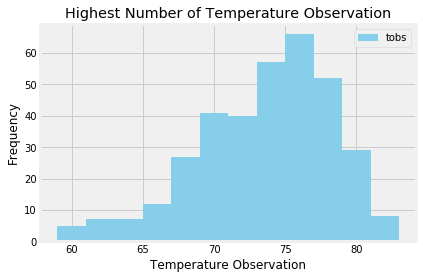

In [28]:
plt.hist(df5.tobs, bins =12, color ='skyblue', label='tobs')
plt.xlabel('Temperature Observation')
plt.ylabel('Frequency')
plt.title("Highest Number of Temperature Observation")
plt.legend()
plt.show()

In [29]:
query_temp1= """
        SELECT
            *
        FROM
            measurement
    

"""

In [30]:
df6 = pd.read_sql(query_temp1, conn)
df6.head()

,id,station,date,prcp,tobs
0,1,USC00519397,2010-01-01,0.08,65.0
1,2,USC00519397,2010-01-02,0.00,63.0
2,3,USC00519397,2010-01-03,0.00,74.0
3,4,USC00519397,2010-01-04,0.00,76.0
4,5,USC00519397,2010-01-06,NaN,73.0


In [31]:
df6 = df6[["date", "prcp", 'tobs']]
df6

,date,prcp,tobs
0,2010-01-01,0.08,65.0
1,2010-01-02,0.00,63.0
2,2010-01-03,0.00,74.0
3,2010-01-04,0.00,76.0
4,2010-01-06,NaN,73.0
...,...,...,...
19545,2017-08-19,0.09,71.0
19546,2017-08-20,NaN,78.0
19547,2017-08-21,0.56,76.0
19548,2017-08-22,0.50,76.0


In [32]:
df6["Date"]=pd.to_datetime(df6.date)
df6.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19550 entries, 0 to 19549
Data columns (total 4 columns):
date    19550 non-null object
prcp    18103 non-null float64
tobs    19550 non-null float64
Date    19550 non-null datetime64[ns]
dtypes: datetime64[ns](1), float64(2), object(1)
memory usage: 611.1+ KB


In [33]:
df7 = df6[["Date", "prcp", 'tobs']]

In [34]:
df7["month_day"]= df6.Date.dt.strftime("%m-%d")
df7.head()


,Date,prcp,tobs,month_day
0,2010-01-01,0.08,65.0,01-01
1,2010-01-02,0.00,63.0,01-02
2,2010-01-03,0.00,74.0,01-03
3,2010-01-04,0.00,76.0,01-04
4,2010-01-06,NaN,73.0,01-06


In [35]:
start="08-26"

In [36]:
mask= (df7['month_day'] == start)
df7.loc[mask]

,Date,prcp,tobs,month_day
215,2010-08-26,0.03,78.0,08-26
550,2011-08-26,0.00,78.0,08-26
909,2012-08-26,0.00,78.0,08-26
1273,2013-08-26,0.00,80.0,08-26
1638,2014-08-26,0.05,77.0,08-26
2000,2015-08-26,0.62,77.0,08-26
2366,2016-08-26,0.00,79.0,08-26
2959,2010-08-26,0.05,74.0,08-26
3323,2011-08-26,0.08,74.0,08-26
3671,2012-08-26,0.02,74.0,08-26


In [37]:
df8 = df7.loc[mask]
df8.head()


,Date,prcp,tobs,month_day
215,2010-08-26,0.03,78.0,08-26
550,2011-08-26,0.00,78.0,08-26
909,2012-08-26,0.00,78.0,08-26
1273,2013-08-26,0.00,80.0,08-26
1638,2014-08-26,0.05,77.0,08-26


In [38]:
df8.tobs.min()

71.0

In [39]:
df8.tobs.max()

84.0

In [40]:
y = df8.tobs.mean()
y

76.56862745098039

<BarContainer object of 1 artists>

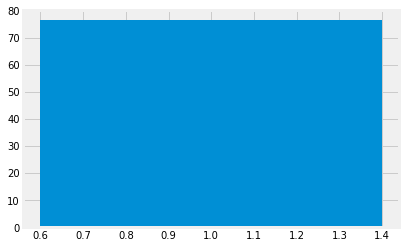

In [41]:
plt.bar(1, y)

<BarContainer object of 1 artists>

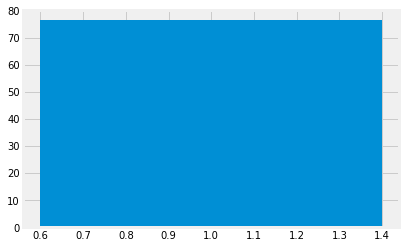

In [42]:
plt.bar(1, y)

In [43]:
yerror= df8.tobs.max() - df8.tobs.min()
yerror

13.0

Text(0, 0.5, 'Temperature')

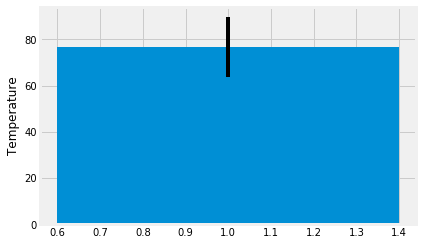

In [44]:
plt.bar(1, y, yerr = yerror)
plt.ylabel("Temperature")

In [63]:
# Function of min, max and average for any given date

def gettempdate(date, df):
    df["month_day"]= df.Date.dt.strftime("%m-%d")
    start = f"{date}"
    mask= (df['month_day'] == start)
    df2 = df.loc[mask]
    
    return(df2.tobs.min(),df2.tobs.max(),df2.tobs.mean())

In [56]:
temp_info = gettempdate("08-26", df7)
temp_info

(71.0, 84.0, 76.56862745098039)

In [57]:
# Set the star/end date of trip

start_date = '2018-8-17'
end_date = '2018-8-26'

# Use the star/end date to crate range
trip_date = pd.date_range(start_date, end_date, freq = 'D')

In [58]:
trip_dates = trip_date.strftime('%m-%d')
trip_dates

Index(['08-17', '08-18', '08-19', '08-20', '08-21', '08-22', '08-23', '08-24',
       '08-25', '08-26'],
      dtype='object')

In [64]:
weekinfo = []

for date in trip_dates:
    weekinfo.append(gettempdate(date, df7))
    
weekinfo

[(69.0, 83.0, 76.125),
 (70.0, 84.0, 76.92307692307692),
 (69.0, 85.0, 75.94642857142857),
 (68.0, 82.0, 76.45283018867924),
 (67.0, 83.0, 76.4),
 (69.0, 84.0, 76.47169811320755),
 (67.0, 87.0, 76.6923076923077),
 (70.0, 84.0, 75.96153846153847),
 (69.0, 82.0, 76.96078431372548),
 (71.0, 84.0, 76.56862745098039)]

In [66]:
df = pd.DataFrame(weekinfo, columns =['tmin', 'tavg', 'tmax'])
df['date'] = trip_dates
df.set_index(['date'], inplace = True)
df.head()

,tmin,tavg,tmax
date,,,
08-17,69.0,83.0,76.125000
08-18,70.0,84.0,76.923077
08-19,69.0,85.0,75.946429
08-20,68.0,82.0,76.452830
08-21,67.0,83.0,76.400000


(array([0., 1., 2., 3., 4., 5., 6., 7., 8., 9.]),
 <a list of 10 Text xticklabel objects>)

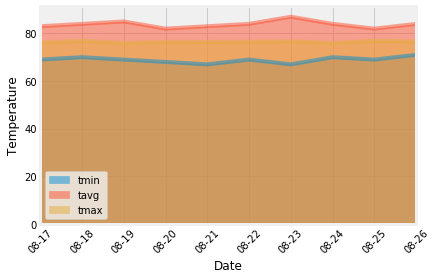

In [67]:
df.plot(kind = 'area', stacked = False, x_compat=True)
plt.xlabel("Date")
plt.ylabel("Temperature")
plt.xticks(rotation = 45)